In [70]:
import face_recognition
import cv2
image = face_recognition.load_image_file("/Users/magu/Documents/face_recognition_demo/images/manman0.png")

face_locations = face_recognition.face_locations(image)

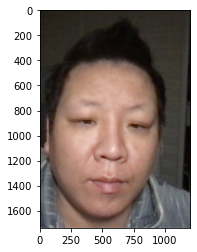

In [71]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

## 识别出人脸的位置

In [72]:
face_locations

[(617, 1043, 1576, 85)]

## 识别128位人脸特征值

In [84]:
face_encodings = face_recognition.face_encodings(image)[0]
face_encodings

array([-4.30105254e-02,  7.99155384e-02,  9.17936713e-02,  2.70967185e-03,
       -7.02446997e-02, -1.07200265e-01, -1.03470869e-02, -2.43047982e-01,
        1.10390656e-01, -9.34741870e-02,  2.30619848e-01, -1.21889286e-01,
       -1.91359252e-01, -9.48028266e-02, -5.08837402e-03,  1.94405958e-01,
       -1.43919498e-01, -1.16156697e-01, -8.00759420e-02,  9.63494182e-03,
        1.90574676e-02, -2.12201122e-02,  7.99434707e-02,  7.35618249e-02,
       -4.99805063e-02, -2.77403057e-01, -8.32184926e-02, -1.92553133e-01,
        1.46613382e-02, -6.75343275e-02, -4.28677350e-02,  4.28854376e-02,
       -1.47468150e-01, -7.04847947e-02,  3.02581489e-02,  9.67372581e-03,
       -4.18216735e-02, -5.56339547e-02,  1.88114896e-01, -8.59644189e-02,
       -2.56657481e-01,  7.02552497e-03,  6.02657758e-02,  1.69470832e-01,
        2.08945304e-01,  2.97816265e-02,  2.98382156e-02, -1.64490268e-01,
        1.20208241e-01, -1.21545374e-01, -1.46060819e-02,  5.71970791e-02,
        8.86239409e-02,  

## 打开摄像头拍摄一张照片

In [74]:
import cv2
video_capture = cv2.VideoCapture(0) 
process_this_frame = True
max_iter = 10
frames = []
n = 0
while n < max_iter:
    n += 1
    ret, frame = video_capture.read()
    # opencv的图像是BGR格式的，而我们需要是的RGB格式的，因此需要进行一个转换。
    # rgb_frame = frame[:, :, ::-1]
    # rgb_face_locations = face_recognition.face_locations(rgb_frame)
    frames.append(frame)

len(frames)

10

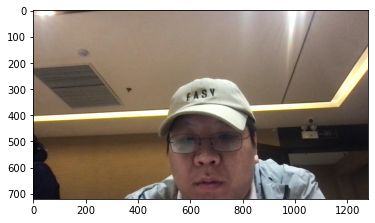

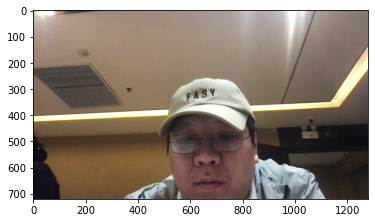

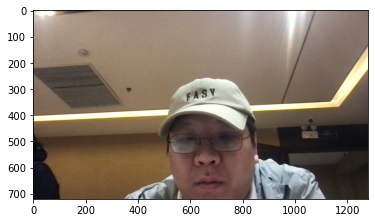

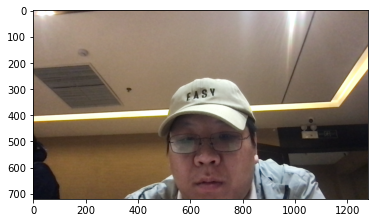

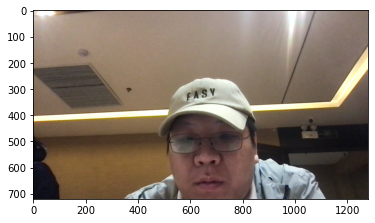

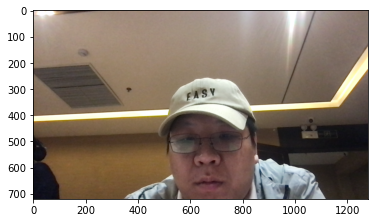

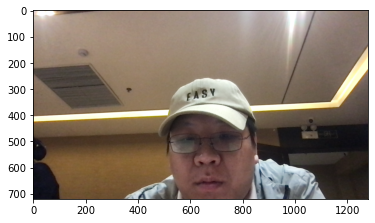

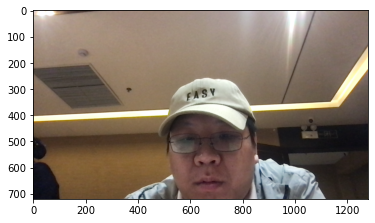

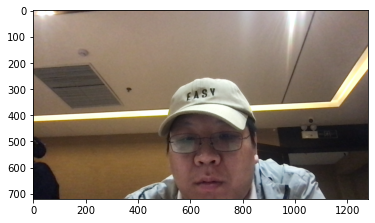

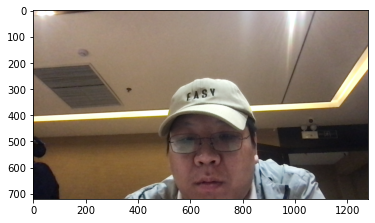

In [75]:
for frame in frames:
    plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))
    plt.show()

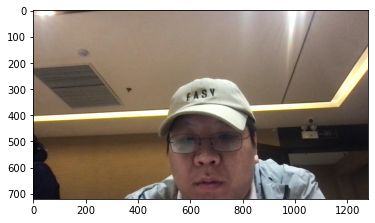

In [76]:
frame = cv2.cvtColor(frames[0],cv2.COLOR_BGR2RGB)
plt.imshow(frame)
plt.show()

In [77]:
rgb_face_encodings = face_recognition.face_encodings(frame)[0]
results = face_recognition.compare_faces([face_encodings],rgb_face_encodings)
print(results)

[True]


In [78]:
import numpy as np
np.linalg.norm(face_encodings-rgb_face_encodings,axis=0) <= 0.4

False

In [94]:
face_encodings,rgb_face_encodings

(array([-4.30105254e-02,  7.99155384e-02,  9.17936713e-02,  2.70967185e-03,
        -7.02446997e-02, -1.07200265e-01, -1.03470869e-02, -2.43047982e-01,
         1.10390656e-01, -9.34741870e-02,  2.30619848e-01, -1.21889286e-01,
        -1.91359252e-01, -9.48028266e-02, -5.08837402e-03,  1.94405958e-01,
        -1.43919498e-01, -1.16156697e-01, -8.00759420e-02,  9.63494182e-03,
         1.90574676e-02, -2.12201122e-02,  7.99434707e-02,  7.35618249e-02,
        -4.99805063e-02, -2.77403057e-01, -8.32184926e-02, -1.92553133e-01,
         1.46613382e-02, -6.75343275e-02, -4.28677350e-02,  4.28854376e-02,
        -1.47468150e-01, -7.04847947e-02,  3.02581489e-02,  9.67372581e-03,
        -4.18216735e-02, -5.56339547e-02,  1.88114896e-01, -8.59644189e-02,
        -2.56657481e-01,  7.02552497e-03,  6.02657758e-02,  1.69470832e-01,
         2.08945304e-01,  2.97816265e-02,  2.98382156e-02, -1.64490268e-01,
         1.20208241e-01, -1.21545374e-01, -1.46060819e-02,  5.71970791e-02,
         8.8

In [93]:
def sim_cos(init_A , init_B):
    unit_vector = np.ones_like(init_A)
    return (init_A * init_B).dot(unit_vector)/(np.sqrt((init_A ** 2).dot(unit_vector)) * np.sqrt((init_B ** 2).dot(unit_vector)) )

sim_cos(face_encodings,rgb_face_encodings)

-0.0006005379281634452